In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
def show_venn(enhanced_sig_set, hr_sig_set):
    venn2(subsets = [hr_sig_set, enhanced_sig_set], set_labels = ('1kb', 'enhanced'), set_colors=((247/255, 129/255, 191/255), (51/255, 160/255, 44/255)))
    plt.show()

In [3]:
active = np.load('../fig2/temp/GM12878_ATAC_H3K27ac_H3K4me3_2_100_enhanced_sigs.npy', allow_pickle=True).item()
represses = np.load('../fig2/represses/temp/GM12878_H3K9me3_H3K27me3_2_100_enhanced_sigs.npy', allow_pickle=True).item()
hr = np.load('../fig2/temp/GM12878_ATAC_H3K27ac_H3K4me3_2_100_hr_sigs.npy', allow_pickle=True).item()


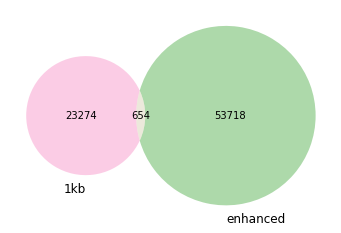

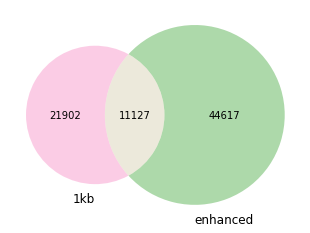

In [4]:
enhanced_sigs = active | represses
hr_sigs = hr.copy()

show_venn(enhanced_sigs, hr)

_enhanced_sigs = enhanced_sigs.copy()
_hr_sigs = set()
for _hr_sig in hr_sigs:
    flag = False
    for _enhanced_sig in _enhanced_sigs:
        if abs(_hr_sig[0]-_enhanced_sig[0])<3 and abs(_hr_sig[1]-_enhanced_sig[1])<3:
            _hr_sigs.add(_enhanced_sig)
            flag = True
    _hr_sigs.add(_hr_sig)
    if flag:
        _enhanced_sigs.add(_hr_sig)

show_venn(_enhanced_sigs, _hr_sigs)